In [4]:
# Data Analysis of Student Habits vs Academic Performance

# 1. Setup and Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 2. Load dataset (modify this part)
import zipfile
import os

# Update this path with the actual download location
zip_path = "C:\\Users\\Nickey\\Downloads\\student-data.zip"  # Fixed quotes and added escaped backslashes

# Extract if zipped
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("student_data")

# Find CSV (or specify directly)
csv_path = None
for file in os.listdir("student_data"):
    if file.endswith(".csv"):
        csv_path = os.path.join("student_data", file)
        break

if csv_path:
    df = pd.read_csv(csv_path)
    print("Data loaded successfully! Columns:", df.columns.tolist())
else:
    print("CSV file not found - check extraction path")

Data loaded successfully! Columns: ['student_id', 'age', 'gender', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'parental_education_level', 'internet_quality', 'mental_health_rating', 'extracurricular_participation', 'exam_score']


In [5]:
if not df.empty:
    # Display basic info
    print("\n=== Dataset Overview ===")
    print(df.info())
    
    # Show first few rows
    print("\n=== First 5 Rows ===")
    print(df.head())
    
    # Check for missing values
    print("\n=== Missing Values ===")
    print(df.isnull().sum())
    
    # Basic statistics
    print("\n=== Basic Statistics ===")
    print(df.describe(include='all'))

# 4. Data Cleaning (Example)
if not df.empty:
    # Handle missing values (example)
    if df.isnull().sum().sum() > 0:
        print("\nHandling missing values...")
        # For numerical columns, fill with median
        num_cols = df.select_dtypes(include=np.number).columns
        df[num_cols] = df[num_cols].fillna(df[num_cols].median())
        
        # For categorical columns, fill with mode
        cat_cols = df.select_dtypes(include='object').columns
        for col in cat_cols:
            df[col] = df[col].fillna(df[col].mode()[0])
    
    # Check for duplicates
    print(f"\nDuplicate rows: {df.duplicated().sum()}")
    df.drop_duplicates(inplace=True)


=== Dataset Overview ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality       

In [6]:
if not df.empty:
    # Assuming the dataset contains these columns (adjust based on actual data)
    # These are example analyses you can perform
    
    print("\n=== Analysis 1: Study Habits vs Performance ===")
    if 'study_time' in df.columns and 'GPA' in df.columns:
        study_gpa = df.groupby('study_time')['GPA'].mean()
        print(study_gpa)
    
    print("\n=== Analysis 2: Sleep Patterns ===")
    if 'sleep_hours' in df.columns:
        print(df['sleep_hours'].value_counts())
    
    # Correlation analysis
    print("\n=== Correlation Analysis ===")
    if {'study_time', 'sleep_hours', 'GPA'}.issubset(df.columns):
        print(df[['study_time', 'sleep_hours', 'GPA']].corr())


=== Analysis 1: Study Habits vs Performance ===

=== Analysis 2: Sleep Patterns ===
sleep_hours
6.5    40
6.1    36
6.2    35
6.7    34
5.5    33
       ..
9.8     1
3.4     1
9.2     1
3.2     1
9.6     1
Name: count, Length: 68, dtype: int64

=== Correlation Analysis ===


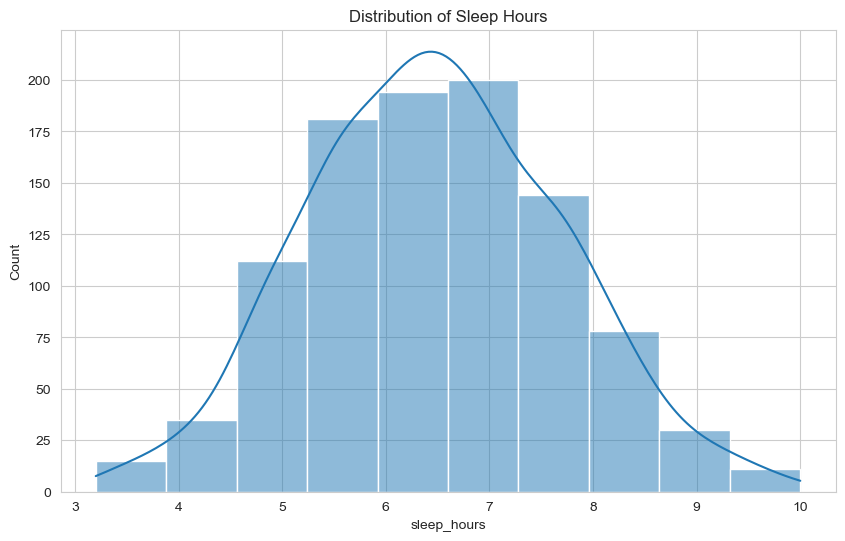

In [11]:
# Visualization 2: Sleep Distribution
if 'sleep_hours' in df.columns:
    plt.figure()
    sns.histplot(df['sleep_hours'], bins=10, kde=True)
    plt.title("Distribution of Sleep Hours")
    plt.show()

In [14]:
# Visualization 3: Correlation Heatmap
if {'study_time', 'sleep_hours', 'GPA'}.issubset(df.columns):
    plt.figure()
    sns.heatmap(df[['study_time', 'sleep_hours', 'GPA']].corr(), 
                annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

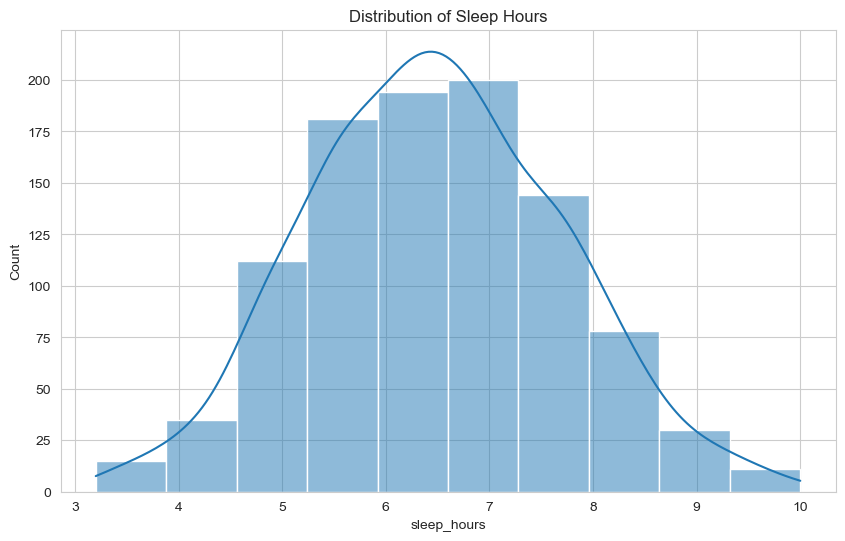


Analysis complete!


In [15]:
if not df.empty:
    # Visualization 1: Study Time vs GPA
    if 'study_time' in df.columns and 'GPA' in df.columns:
        plt.figure()
        sns.boxplot(x='study_time', y='GPA', data=df)
        plt.title("Academic Performance by Study Time")
        plt.show()
    
    # Visualization 2: Sleep Distribution
    if 'sleep_hours' in df.columns:
        plt.figure()
        sns.histplot(df['sleep_hours'], bins=10, kde=True)
        plt.title("Distribution of Sleep Hours")
        plt.show()
    
    # Visualization 3: Correlation Heatmap
    if {'study_time', 'sleep_hours', 'GPA'}.issubset(df.columns):
        plt.figure()
        sns.heatmap(df[['study_time', 'sleep_hours', 'GPA']].corr(), 
                    annot=True, cmap='coolwarm')
        plt.title("Correlation Heatmap")
        plt.show()
    
    # Visualization 4: Scatter Plot
    if 'study_time' in df.columns and 'GPA' in df.columns:
        plt.figure()
        sns.scatterplot(x='study_time', y='GPA', data=df)
        plt.title("Study Time vs GPA")
        plt.show()

print("\nAnalysis complete!")